# Remember to change the ipython core at the beginning of using this file.

In [56]:
import RCSystem
import defaultPose
import copy
import time, os
rb = ''
rb = RCSystem.robot(duration=2, webcam=False)

[INFO]robot initializing...
initialize_robotParams


[INFO]Smoothly execution activated
[INFO]return_to_stable_state, self.robotParams are all set
[INFO]robot initialized.


In [57]:
rb.return_to_stable_state()
rb.connect_ros(True, False)



[INFO]Smoothly execution activated
[INFO]return_to_stable_state, self.robotParams are all set
[INFO]Smoothly execution activated


0

# return 

In [4]:
# return 
global smoothSleepTime
smoothSleepTime = 0.05
def returnnnnn():
    mypose = rb.AUPose['StandardPose']
    mypose[34] = 105
    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False, steps=50)
    print('returnnnnn')

In [5]:
returnnnnn()

[INFO]Smoothly execution activated
returnnnnn


In [58]:
print(rb.lastParams)
print(defaultPose.prototypeFacialExpressions['happiness'])



print(rb.AUPose['StandardPose'])

{'x1': 64, 'x2': 64, 'x3': 128, 'x4': 128, 'x5': 128, 'x6': 0, 'x7': 0, 'x8': 0, 'x9': 0, 'x10': 0, 'x11': 0, 'x12': 0, 'x13': 0, 'x14': 0, 'x15': 0, 'x16': 0, 'x17': 0, 'x18': 0, 'x19': 0, 'x20': 0, 'x21': 0, 'x22': 0, 'x23': 0, 'x24': 0, 'x25': 0, 'x26': 0, 'x27': 0, 'x28': 0, 'x29': 0, 'x30': 0, 'x31': 0, 'x32': 32, 'x33': 128, 'x34': 128, 'x35': 105}
[86, 86, 128, 128, 128, 255, 255, 0, 255, 0, 0, 0, 255, 0, 0, 255, 255, 255, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
[86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 105]


# Webcam (if you use

In [59]:
DEVICE_ID = 2
WIDTH = 1280
HEIGHT = 720

webcam = RCSystem.WebcamStreamWidget(DEVICE_ID, WIDTH, HEIGHT)
webcam.start()

[INFO]WebcamStreamWidget initializing...
[INFO]WebcamStreamWidget initialized.


In [60]:
def start_taking_v(appendix='', folder=''):
    fileName = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime()) 
    if appendix:
        fileName += "_" + appendix + ".mkv"
    else:
        fileName += ".mkv"
        
    if not os.path.exists('video_analysis/temp'):
        os.makedirs('video_analysis/temp')
        
    if folder:
        folderPath = "video_analysis/{}/".format(folder)
        if not os.path.exists(folderPath):
            try:
                os.makedirs(folderPath)
                print('[INFO]make video folder')
            except Exception as e:
                print(e)
    # setup filename
    if not folder:
        fileName = "video_analysis/temp/{}".format(fileName)
    else:
        fileName = folderPath + fileName
        

        
    # save file in another thread
    if fileName:
        webcam.start_video_recording(fileName)
        print('[INFO]video recording started.')
        return 0
    else:
        raise ValueError('[ValueError] self.readablefileName is {}.'.format(fileName))
        
# stop video recording
def stop_taking_v():
    webcam.stop_video_recording()
    print('[INFO]video recording stopped.')

# cuntomize here

In [6]:
global smoothSleepTime
smoothSleepTime = 0.05
def change_one_axis(x, y, steps=25): 
    mypose = copy.deepcopy(rb.AUPose['StandardPose']) 
    mypose[34] = 105
    mypose[x] = y
    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False, steps=steps, isUsingSigmoid=True, sigmoid_factor=7) # isSmoothly = True ,isRecording = True
    time.sleep(1)
    
def change_multi_axes(xs, ys, steps=25):
    mypose = copy.deepcopy(rb.AUPose['StandardPose']) 
    mypose[34] = 105
    for i, x in enumerate(xs):
        mypose[x] = ys[i]
    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False, steps=steps, isUsingSigmoid=True, sigmoid_factor=7) # isSmoothly = True ,isRecording = True
    time.sleep(1)

# adjust nikola param by hand

In [46]:
import random

print(random.randint(0, 256))
print(random.randint(0, 256))

64
135


In [52]:
returnnnnn()

[INFO]Smoothly execution activated
returnnnnn


In [65]:
pp = [[83, 180], [2, 152], [193, 91], [133, 162], [145, 91], [71, 91], [182, 20]]

# mypose[33] = 133
# mypose[34] = 162

# mypose[33] = 60
# mypose[34] = 123

# mypose[33] = 146
# mypose[34] = 42

# mypose[33] = 183
# mypose[34] = 20

# mypose[33] = 178
# mypose[34] = 146

# mypose[33] = 145
# mypose[34] = 91

# mypose[33] = 71
# mypose[34] = 91]

In [66]:
# happy
import copy, time

global smoothSleepTime
smoothSleepTime = 0.05


start_taking_v(appendix='idle_behavior', folder='')
time.sleep(1)

for i in pp:
    # mypose = copy.deepcopy(defaultPose.prototypeFacialExpressions['happiness'])
    mypose = copy.deepcopy(defaultPose.actionUnitParams['StandardPose'])
    mypose[33] = i[0]
    mypose[34] = i[1]

    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False, steps=200, isUsingSigmoid=False, sigmoid_factor=5, debugmode=False)

    time.sleep(3)

# mypose = copy.deepcopy(defaultPose.actionUnitParams['StandardPose'])
# mypose[33] = 250
# mypose[34] = 
# rb.switch_to_customizedPose(mypose)
# rb.connect_ros(True, False, steps=50, isUsingSigmoid=False, sigmoid_factor=5, debugmode=True)

# time.sleep(3)
returnnnnn()

time.sleep(3)
stop_taking_v()

[INFO]video recording started.
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
returnnnnn
Video saved to video_analysis/temp/2024_02_29_12_14_20_idle_behavior.mkv
[INFO]video recording stopped.
[Exiting] No more frames to read


[ WARN:16] global /tmp/pip-req-build-5mtujfce/opencv/modules/videoio/src/cap_v4l.cpp (802) requestBuffers VIDEOIO(V4L2:/dev/video2): failed VIDIOC_REQBUFS: errno=19 (No such device)


In [25]:

# start_taking_v(appendix='head_down', folder='tunning')

In [39]:
stop_taking_v()

Video saved to video_analysis/temp/2024_02_23_16_35_03_head_down_with_eye.mkv
[INFO]video recording stopped.


# Do recording!

In [44]:
time.sleep(2)

def return_to_standardpose():
    # return to standard pose
    mypose = copy.deepcopy(rb.AUPose['StandardPose']) 
    mypose[34] = 105
    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False, steps=a[i], isUsingSigmoid=True, sigmoid_factor=7)

return_to_standardpose()
    
# start_taking_v(appendix='head_down_with_eye', folder='tunning')
start_taking_v(appendix='head_down_with_eye', folder='')
time.sleep(1)

# a=[4, 6, 8, 10]
# a=[1/smoothSleepTime, 1.5/smoothSleepTime, 2/smoothSleepTime]

a=[2/smoothSleepTime, 2.5/smoothSleepTime, 3/smoothSleepTime, 3.5/smoothSleepTime, 4/smoothSleepTime]
a = [3.5/smoothSleepTime, 4/smoothSleepTime]
a = list(map(int, a))
print(a)

# Result: head_down sigmoid 7 with 4s is very good!
# head down: change_one_axis(34-1, 30, a[i])
# head up: change_one_axis(34-1, 128, a[i])

# Result: head_down with eye. sigmoid 7, 4s, good!
# 

# a = [i for i in range(2, 11)]

for i in range(len(a)):
    time.sleep(2)
    
    change_multi_axes([1-1,2-1,6-1,7-1, 34-1, 5-1], [255, 255, 40, 90, 30, 10], a[i])
    time.sleep(3)
    change_multi_axes([1-1,2-1,6-1,7-1, 34-1, 5-1], [86, 86, 0, 0, 128, 128], a[i])
    time.sleep(2)
    
    # change emotion
    happypose = copy.deepcopy(defaultPose.prototypeFacialExpressions['happiness']) 
    happypose[34] = 105
    rb.switch_to_customizedPose(happypose)
    rb.connect_ros(True, False, steps=a[i], isUsingSigmoid=True, sigmoid_factor=7)
    
    time.sleep(2)
    
    # return to standard pose
    return_to_standardpose()
    
    time.sleep(3)
    
    # angry
    
    angrypose = copy.deepcopy(defaultPose.prototypeFacialExpressions['anger']) 
    angrypose[34] = 105
    rb.switch_to_customizedPose(angrypose)
    rb.connect_ros(True, False, steps=a[i], isUsingSigmoid=True, sigmoid_factor=7)
    
    time.sleep(2)
    
    # return to standard pose
    return_to_standardpose()
    time.sleep(2)

time.sleep(3)
stop_taking_v()

[INFO]Smoothly execution activated
[INFO]video recording started.
[70, 80]
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
Video saved to video_analysis/temp/2024_02_23_16_47_36_head_down_with_eye.mkv
[INFO]video recording stopped.


In [34]:
global smoothSleepTime
smoothSleepTime = 0.05
time.sleep(3)
change_one_axis(5-1, 0, 80)
time.sleep(3)
change_one_axis(5-1, 220, 80)
# change_one_axis(35-1, 230, 15)


[INFO]Smoothly execution activated
[INFO]Smoothly execution activated


In [21]:
# import time 

# mypose = copy.deepcopy(rb.AUPose['StandardPose'])
# # mypose[3] = 128
# mypose[32] = 30
# mypose[33] = 128
# mypose[34] = 95
# # mypose[0] = mypose[1] 

# time.sleep(3)
# rb.switch_to_customizedPose(mypose)
# rb.connect_ros(True, False, steps=15, isUsingSigmoid=True) # isSmoothly = True ,isRecording = True

# time.sleep(1)

# mypose[32] = 220
# mypose[33] = 220
# mypose[34] = 30

# rb.switch_to_customizedPose(mypose)
# rb.connect_ros(True, False, steps=15, isUsingSigmoid=True) # isSmoothly = True ,isRecording = True


[INFO]Smoothly execution activated
[INFO]Smoothly execution activated


0

In [11]:
returnnnnn()

[INFO]Smoothly execution activated
returnnnnn



# mypose[0] + mypose[5] <= 262

Step 1: Stage Param = 65.00, Time Interval = 1.00
Step 2: Stage Param = 65.00, Time Interval = 1.00
Step 3: Stage Param = 65.00, Time Interval = 1.00
Step 4: Stage Param = 65.00, Time Interval = 1.00
Step 5: Stage Param = 65.00, Time Interval = 1.00
Step 6: Stage Param = 65.00, Time Interval = 1.00
Step 7: Stage Param = 65.00, Time Interval = 1.00
Step 8: Stage Param = 65.00, Time Interval = 1.00
Step 9: Stage Param = 65.01, Time Interval = 1.00
Step 10: Stage Param = 66.28, Time Interval = 0.99
Step 11: Stage Param = 160.50, Time Interval = 0.50
Step 12: Stage Param = 254.72, Time Interval = 0.01
Step 13: Stage Param = 255.99, Time Interval = 0.00
Step 14: Stage Param = 256.00, Time Interval = 0.00
Step 15: Stage Param = 256.00, Time Interval = 0.00
Step 16: Stage Param = 256.00, Time Interval = 0.00
Step 17: Stage Param = 256.00, Time Interval = 0.00
Step 18: Stage Param = 256.00, Time Interval = 0.00
Step 19: Stage Param = 256.00, Time Interval = 0.00
Step 20: Stage Param = 256.00, 

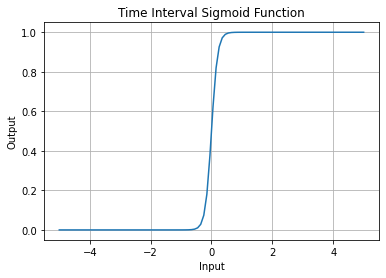

In [45]:
import math
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x, steepness):
    return 1 / (1 + np.exp(-steepness * x))

def smooth_transition(start, end, num_steps, steepness):
    transition_values = []
    for i in range(num_steps):
        # Calculate the parameter for this step
        stage_param = start + (end - start) * sigmoid(10 * (i / num_steps - 0.5), steepness)
        
        # Calculate the time interval for this step using a sigmoid function
        time_interval = 1 - sigmoid(10 * (i / num_steps - 0.5), steepness)
        
        transition_values.append((stage_param, time_interval))
    return transition_values

# Example usage:
start_stage = 65
end_stage = 256
num_steps = 20
steepness = 10

transition_values = smooth_transition(start_stage, end_stage, num_steps, steepness)
for i, (value, time_interval) in enumerate(transition_values):
    print(f"Step {i+1}: Stage Param = {value:.2f}, Time Interval = {time_interval:.2f}")

# Plotting the sigmoid for visualization
x = np.linspace(-5, 5, 100)
y = sigmoid(x, steepness)
plt.plot(x, y)
plt.title('Time Interval Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()


[ 64.15824788  64.42834246  65.15111744  67.03525588  71.62898701
  81.21225097  96.         110.78774903 120.37101299 124.96474412
 126.84888256 127.57165754 128.        ]


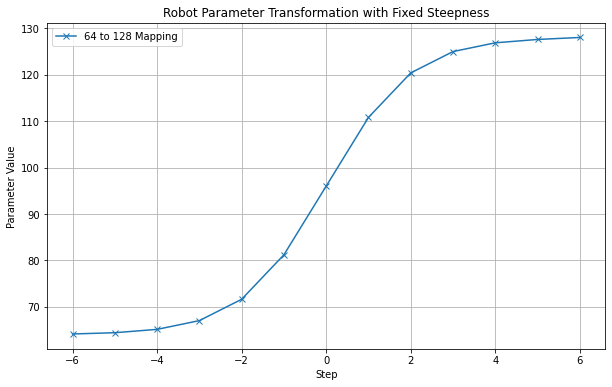

13

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def map_sigmoid_to_range(start, end, default_steps=20, min_step=5, steepness_range=(-6, 6)):
    # Calculate the total change
    total_change = end - start
    
    # Initial assumption for the number of steps
    steps = default_steps

    # Calculate initial step size
    initial_step_size = total_change / steps

    # Determine the adjusted number of steps based on the minimum step size
    if initial_step_size < min_step:
        steps = max(int(np.ceil(total_change / min_step)), 2)  # Ensure at least 2 steps

    # Generate steps equally spaced values in the steepness range
    x_values_adjusted = np.linspace(steepness_range[0], steepness_range[1], steps)

    # Apply the sigmoid function to these x values
    sigmoid_values_adjusted = sigmoid(x_values_adjusted)

    # Map the sigmoid output to the range start to end
    mapped_values_adjusted = start + (end - start) * sigmoid_values_adjusted

    # Ensure the last value is exactly end
    mapped_values_adjusted[-1] = end

    return x_values_adjusted, mapped_values_adjusted

# Example usage: Map the sigmoid function for a range of 64 to 128
x_values_64_128, mapped_values_64_128 = map_sigmoid_to_range(64, 128)
print(mapped_values_64_128)
# Plotting for the range of 64 to 128
plt.figure(figsize=(10, 6))
plt.plot(x_values_64_128, mapped_values_64_128, label="64 to 128 Mapping", marker='x')
plt.title("Robot Parameter Transformation with Fixed Steepness")
plt.xlabel("Step")
plt.ylabel("Parameter Value")
plt.legend()
plt.grid(True)
plt.show()

len(mapped_values_64_128)  # Display the adjusted number of steps


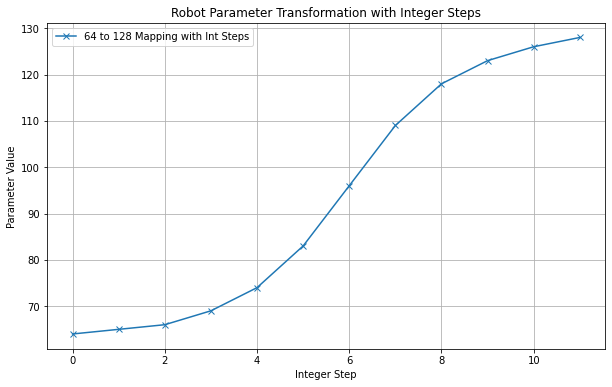

(12, array([ 64,  65,  66,  69,  74,  83,  96, 109, 118, 123, 126, 128]))

In [52]:
def map_sigmoid_to_range_with_int_steps(start, end, min_step=5, steepness_factor=10):
    # Calculate the total change and the base number of steps
    total_change = end - start
    base_steps = max(int(total_change / min_step), 2)  # Ensure at least 2 steps

    # Generate integer steps from 0 to base_steps
    int_steps = np.arange(base_steps)

    # Apply a steepness factor to spread out the sigmoid values more evenly
    x_values = steepness_factor * (int_steps / base_steps - 0.5)

    # Apply the sigmoid function to these x values
    sigmoid_values = sigmoid(x_values)

    # Map the sigmoid output to the range start to end, ensuring integer steps
    mapped_values = np.round(start + (end - start) * sigmoid_values).astype(int)

    # Ensure the last value is exactly end
    mapped_values[-1] = end

    return int_steps, mapped_values

# Example usage: Map the sigmoid function for a range of 64 to 128 with integer steps
int_steps_64_128, mapped_values_64_128_int = map_sigmoid_to_range_with_int_steps(64, 128)

# Plotting for the range of 64 to 128 with integer steps
plt.figure(figsize=(10, 6))
plt.plot(int_steps_64_128, mapped_values_64_128_int, label="64 to 128 Mapping with Int Steps", marker='x')
plt.title("Robot Parameter Transformation with Integer Steps")
plt.xlabel("Integer Step")
plt.ylabel("Parameter Value")
plt.legend()
plt.grid(True)
plt.show()

len(mapped_values_64_128_int), mapped_values_64_128_int  # Display the number of steps and the steps


['', '', '', '', '']


<Figure size 640x480 with 0 Axes>

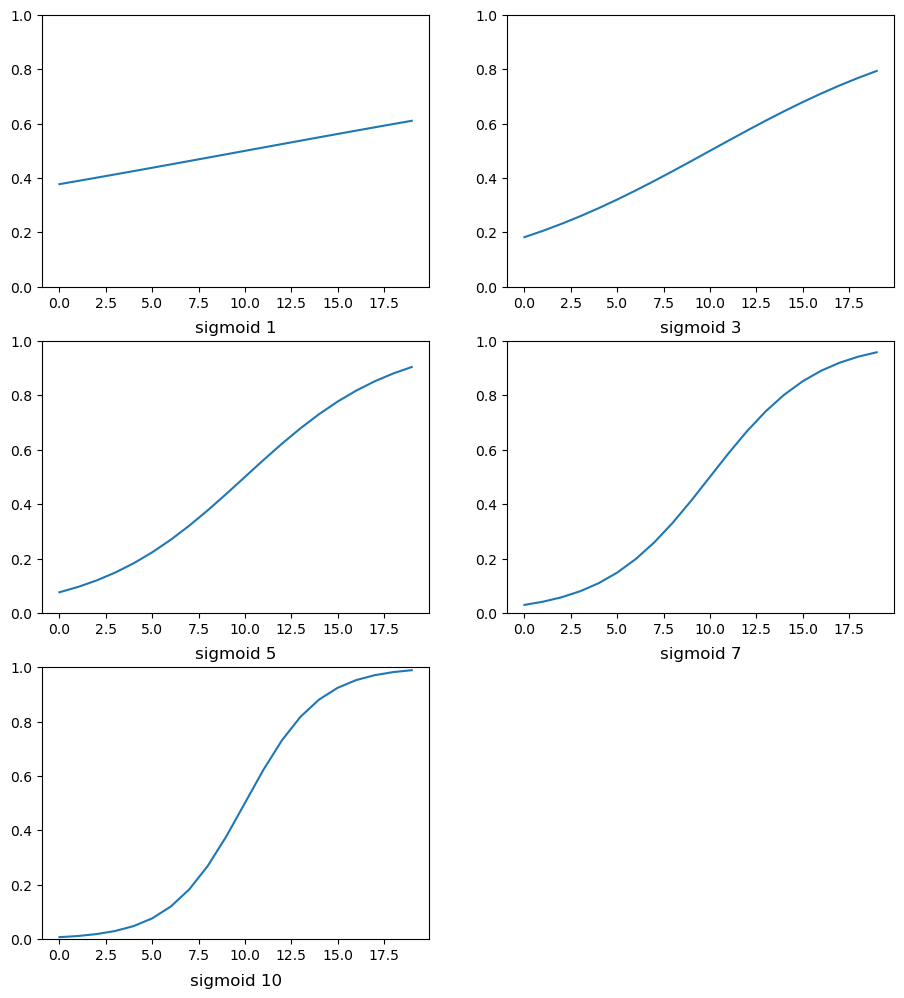

In [14]:
import math
import matplotlib.pyplot as plt
plt.subplots_adjust(hspace=2, wspace=1)
fig = plt.figure(figsize=(11, 12))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

axes = [_ for i in range(5)]
print(axes)
for p, s in enumerate([1, 3, 5, 7, 10]):
    stepNum = 20
    y = []
    for i in range(stepNum):
        temp = sigmoid(s * (i / stepNum - 0.5))
        y.append(temp)
        # print(temp)
    x = [k for k in range(len(y))]
    axes[p] = plt.subplot(3, 2, p+1)
#     axes[p].set_xlim([0, 5])
    axes[p].set_ylim([0, 1])
    axes[p].plot(x, y)
    axes[p].set_title(f'sigmoid {s}', y=-0.2)
# start + (end - start)
# plt.savefig('sigmoid.png', dpi=300, bbox_inches='tight')

In [31]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# "neutral" :
A = [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
# "happiness"
B = [86, 86, 128, 128, 128, 255, 255, 0, 255, 0, 0, 0, 255, 0, 0, 255, 255, 255, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
    
stepNum = 25

lastParams = A
robotParams = B

sigmoid_factor = 10

paramset = []
for i in range(0, stepNum):
    frab = (i + 1) / float(stepNum)
    currentParams = [0 for i in range(len(A))]

    for k, v in enumerate(lastParams):
        start = lastParams[k]
        end = robotParams[k]
#         print(start, end)
        currentParams[k] = start + (end - start) * sigmoid(sigmoid_factor * (i / stepNum - 0.5))
#     print('DEBUG:', currentParams)
    paramset.append(currentParams)

1.706676985692638 252.4622905239394
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] [1.706676985692638, 2.5377094760606007, 3.767378081784629, 5.579724088713271, 8.235343498104886, 12.09359766027953, 17.630297187553438, 25.43637472551972, 36.1720215496244, 50.443108417561646, 68.58006244934876, 90.35764191242215, 114.79233068531812, 140.20766931468188, 164.6423580875779, 186.41993755065124, 204.55689158243837, 218.82797845037564, 229.56362527448027, 237.36970281244658, 242.9064023397205, 246.7646565018951, 249.4202759112867, 251.23262191821536, 252.4622905239394]


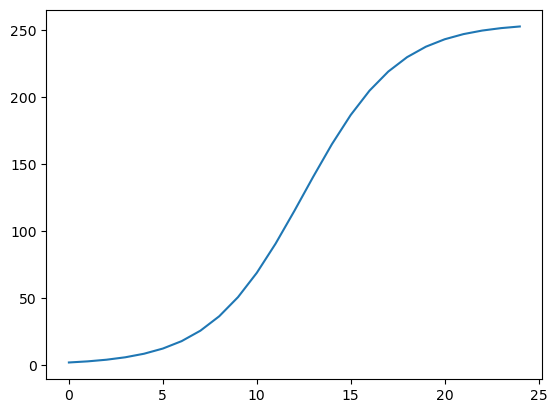

In [32]:
print(y[0], y[-1])
y = [i[5] for i in paramset]
x = [i for i in range(len(y))]
print(x, y)
plt.plot(x, y)
plt.show()

In [ ]:




print(len(mypose))

# recover from 

In [6]:
# build my customize 
import copy
import numpy as np
import pandas as pd
# mypath = '/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/happiness/2023_12_25_17_03_54_happiness_50_axes_data.csv'
# mypath = '/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/happiness/2023_12_25_17_04_06_happiness_54_axes_data.csv'
# mypath = '/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/happiness/' + '2023_12_25_17_55_38_happiness_0_axes_data.csv'
# tmp_an = pd.read_csv(mypath)
# print(tmp_an)
# print(tmp_an['x1'])
# print(tmp_an['x6'])

In [11]:


def checkParameters(robotParams):
    # Axis (8, 9), (12, 13), (18, 19), (22, 23), 
    # we should use a * b = 0 for each group. 
    # Which means, take (8, 9) for example. 
    # When axis 8 has value, we should make sure axis 9 is set to 0. 
    if robotParams[8-1] * robotParams[9-1] != 0:
        robotParams[np.random.choice([8-1, 9-1])] = 0
    if robotParams[12-1] * robotParams[13-1] != 0:
        robotParams[np.random.choice([12-1, 13-1])] = 0
    if robotParams[18-1] * robotParams[19-1] != 0:
        robotParams[np.random.choice([18-1, 19-1])] = 0

    # This part might cause left not equal to right
    # if robotParams[22-1] * robotParams[23-1] != 0:
    #     robotParams[np.random.choice([22-1, 23-1])] = 0
        
    # x22 = x18, x23 = x19
    robotParams[21] = robotParams[17]
    robotParams[22] = robotParams[18]


    assert robotParams[8-1] * robotParams[9-1] == 0
    assert robotParams[12-1] * robotParams[13-1] == 0
    assert robotParams[18-1] * robotParams[19-1] == 0
    assert robotParams[22-1] * robotParams[23-1] == 0
    return robotParams

def fix_robot_param(fixedrobotcode):

    # x2 = x1, use one axis for eyes upper lid
    # fixedrobotcode[0] = 0
    fixedrobotcode[1] = fixedrobotcode[0]
    # x7 = x6, use one axis for eyes lower lid
    fixedrobotcode[6] = fixedrobotcode[5]
    # x12 = x8
    fixedrobotcode[11] = fixedrobotcode[7]
    # x13 = x9
    fixedrobotcode[12] = fixedrobotcode[8]
    # x14  = x10
    fixedrobotcode[13] = fixedrobotcode[9]
    # x17 = x16
    fixedrobotcode[16] = fixedrobotcode[15]
    # x22 = x18
    fixedrobotcode[21] = fixedrobotcode[17]
    # x23 = x19
    fixedrobotcode[22] = fixedrobotcode[18]
    # x24 = x20
    fixedrobotcode[23] = fixedrobotcode[19]
    # To open all axes
    # x4 = x3
    fixedrobotcode[3] = fixedrobotcode[2]
    # x15 = x11
    fixedrobotcode[14] = fixedrobotcode[10]
    fixedrobotcode = checkParameters(fixedrobotcode)
    return fixedrobotcode

def recover_param_from_csv(csv_name, steps=20):
    df = pd.read_csv(csv_name)
    neutral = [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 95]
    fixedrobotcode = copy.copy(neutral)
    # dict = {}
    for k,v in df.to_dict().items():
    #     print('k,v', k,v)
        if "x" in k:
            fixedrobotcode[int(k[1:])-1] = round(v[0])
    
    fixedrobotcode = fix_robot_param(fixedrobotcode)

    # control robot
    rb.switch_to_customizedPose(fixedrobotcode)
    global smoothSleepTime
    smoothSleepTime = 0.03
    returncode = rb.connect_ros(isSmoothly=True, isRecording=False, steps=steps) # isSmoothly = True ,isRecording = True
    time.sleep(0.5)
    


In [16]:
print(rb.robotParams)

{'x1': 84, 'x2': 84, 'x3': 128, 'x4': 128, 'x5': 128, 'x6': 198, 'x7': 198, 'x8': 93, 'x9': 0, 'x10': 0, 'x11': 0, 'x12': 93, 'x13': 0, 'x14': 0, 'x15': 0, 'x16': 255, 'x17': 255, 'x18': 255, 'x19': 0, 'x20': 255, 'x21': 0, 'x22': 255, 'x23': 0, 'x24': 255, 'x25': 0, 'x26': 0, 'x27': 0, 'x28': 255, 'x29': 0, 'x30': 162, 'x31': 0, 'x32': 68, 'x33': 128, 'x34': 128, 'x35': 95}


In [12]:
fn = '2023_12_25_18_57_16_happiness_426_axes_data.csv'
recover_param_from_csv(f'image_analysis/happiness/{fn}')

[INFO]Smoothly execution activated


In [93]:
# print(fixedrobotcode[0])
print(fixedrobotcode[32-1])

86
255


In [89]:
returnnnnn()
# fixedrobotcode[0] = 86
# fixedrobotcode[1] = fixedrobotcode[0]
# fixedrobotcode[5] = 255
# fixedrobotcode[6] = fixedrobotcode[5]
rb.switch_to_customizedPose(fixedrobotcode)
rb.connect_ros(True, False)

[INFO]Smoothly execution activated
returnnnnn
[INFO]Smoothly execution activated


0

In [ ]:
returnnnnn()

In [61]:
axes_data = ""

for i, axis in enumerate(fixedrobotcode):
    axes_data += f"x{i+1}: {axis}, "
print(axes_data)

x1: 120, x2: 120, x3: 128, x4: 128, x5: 128, x6: 0, x7: 0, x8: 106, x9: 0, x10: 255, x11: 0, x12: 0, x13: 35, x14: 255, x15: 0, x16: 255, x17: 255, x18: 200, x19: 0, x20: 158, x21: 0, x22: 200, x23: 0, x24: 158, x25: 0, x26: 0, x27: 0, x28: 255, x29: 143, x30: 0, x31: 0, x32: 0, x33: 128, x34: 128, x35: 95, 


In [2]:
from RCSystem import *
import RCSystem
import defaultPose
import copy
import time
rb = RCSystem.robot(duration=3, webcam=True)

[INFO]robot initializing...
initialize_robotParams


[INFO]Smoothly execution activated
[INFO]return_to_stable_state, self.robotParams are all set
[INFO]WebcamStreamWidget initializing...
[INFO]WebcamStreamWidget initialized.
[INFO]robot and webcam initialized.


In [7]:
def py_feat_analysis(img, target_emotion, is_save_csv=True):
    from feat import Detector
    '''
        @img: file name 
        @target_emotion: Anger, Disgust, Fear, Happiness, Sadness, Surprise
    '''
    global detector
    
    image_prediction = detector.detect_image(img)
    df = image_prediction.head()
    if FEAT_VERSION == 0:
        emo_df = df.iloc[-1:,-8:] # feat 0.3.7
    elif FEAT_VERSION == 1:
        emo_df = df.iloc[-1:,-9:-1] # feat 0.5.0
    else:
        raise Exception("FEAT_VERSION is not correct")

    if is_save_csv:
        csv_name = img[:-4]+".csv"
        csv_emotion_name = img[:-4]+"_emotion.csv"
        df.to_csv(csv_name)
        emo_df.to_csv(csv_emotion_name)
    targetID = get_target(target_emotion)
    if DEBUG > 0:
        print("[INFO]py_feat_analysis: {}".format(list(df[target_emotion])[0]))
    # return emo_df.iloc[0,targetID]
    return list(df[target_emotion])[0]

In [15]:

headYaw_fix_flag = True
headYaw_fix = 95
global detector
detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')
for k,v in defaultPose.prototypeFacialExpressions.items():
    if k == 'neutral':
        continue
    print("switch to: ", k)
    v[34] = 95
    rb.switch_to_customizedPose(v)
    rb.connect_ros(isSmoothly=True, isRecording=False) # isSmoothly = True ,isRecording = True
    rb.take_picture_cv(isUsingCounter=False, appendix='{}_{}'.format(k, 'test'), folder=k)
    time.sleep(3)
    print("py_feat_analysis result is: ", py_feat_analysis(rb.fileName, k))

    # save robot param data
    robot_param = pd.DataFrame({k:[v] for k, v in rb.robotParams.items()})
    robot_param_name = rb.readablefileName[:-4]+"_rb_paramdata.csv"
    robot_param.to_csv(robot_param_name, index=False, sep=',')

rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
rb.connect_ros(True, False)

switch to:  anger
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


py_feat_analysis result is:  0.02138419821858406
switch to:  disgust
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


py_feat_analysis result is:  0.03056081011891365
switch to:  fear
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


py_feat_analysis result is:  0.01827377825975418
switch to:  happiness
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


py_feat_analysis result is:  0.23581530153751373
switch to:  sadness
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


py_feat_analysis result is:  0.5012462735176086
switch to:  surprise
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


py_feat_analysis result is:  0.6261047720909119
[INFO]Smoothly execution activated


0

In [17]:
headYaw_fix_flag = True
headYaw_fix = 95
global detector
detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')
for k,v in defaultPose.hotExpressions.items():
    if k == 'neutral':
        continue
    print("switch to: ", k)
    v[34] = 95
    rb.switch_to_customizedPose(v)
    rb.connect_ros(isSmoothly=True, isRecording=False) # isSmoothly = True ,isRecording = True
    rb.take_picture_cv(isUsingCounter=False, appendix='{}_{}'.format(k, 'test'), folder=k)
    time.sleep(3)
    print("py_feat_analysis result is: ", py_feat_analysis(rb.fileName, k[3:].lower()))

    # save robot param data
    robot_param = pd.DataFrame({k:[v] for k, v in rb.robotParams.items()})
    robot_param_name = rb.readablefileName[:-4]+"_rb_paramdata.csv"
    robot_param.to_csv(robot_param_name, index=False, sep=',')

rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
rb.connect_ros(True, False)


switch to:  hotAnger
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]


py_feat_analysis result is:  0.1619025468826294
switch to:  hotDisgust
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.13s/it]


py_feat_analysis result is:  3.043833567062393e-05
switch to:  hotFear
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


py_feat_analysis result is:  0.39156797528266907
switch to:  hotHappiness
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]


py_feat_analysis result is:  0.034188851714134216
switch to:  hotSadness
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]


py_feat_analysis result is:  0.05745970457792282
switch to:  hotSurprise
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]


py_feat_analysis result is:  0.9935128092765808
[INFO]Smoothly execution activated


0